# Exploration of original cases

In this notebook we explore the characteristics of the original artificial cases datasets. We aim to answer the following questions:
- How many cases are there?
- How long are they?
- How many unique tokens are there?
- Are all of they structured in the same way?

We also have some metadata about the cases containing the MeSH terms in it. We will explore the distribution of these terms in the cases.

In [108]:
import pandas as pd
import os

import matplotlib.pyplot as plt

main_path = "data/translated_dutch_gpt4o_mini"

# Data Exploration

## Amount of data

In [109]:
n_cc = len(os.listdir(main_path))
print("There are {} clinical cases".format(n_cc))

There are 1000 clinical cases


In [110]:
def extract_txt(path, filename):
    total_path = os.path.join(path, filename)
    return filename, open(total_path, "r").read()

def files_to_df(path, extensions=["txt"]):
    files = [x for x in os.listdir(path) if x.split(".")[-1] in extensions]
    data = [extract_txt(path, f) for f in files]
    return pd.DataFrame(data, columns=["filename", "text"])

df = files_to_df(main_path)

In [111]:
df.head()

,filename,text
0,37829491_transformed.txt,{'instruction': 'Translate the text from Engli...
1,34390221_transformed.txt,{'instruction': 'Translate the text from Engli...
2,37861258_transformed.txt,{'instruction': 'Translate the text from Engli...
3,29521319_transformed.txt,{'instruction': 'Translate the text from Engli...
4,32330356_2_transformed.txt,{'instruction': 'Translate the text from Engli...


In [112]:
df["text_orig"] = df["text"]
df["text"] = df["text_orig"].apply(lambda x: x.split("'text_to_transform': ")[-1][:-1].replace("'", ""))
df

,filename,text,text_orig
0,37829491_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
1,34390221_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
2,37861258_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
3,29521319_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
4,32330356_2_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
...,...,...,...
995,29563373_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
996,37085890_1_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
997,31368900_1_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
998,35355435_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...


In [113]:
df["n_char"] = df["text"].str.len()
df["n_words"] = df["text"].str.split(r"\n|\s").str.len()
df.head()

,filename,text,text_orig,n_char,n_words
0,37829491_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2965,430
1,34390221_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,4689,581
2,37861258_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2847,385
3,29521319_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2400,327
4,32330356_2_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2152,285


Text(0.5, 1.0, 'Number of words in clinical cases')

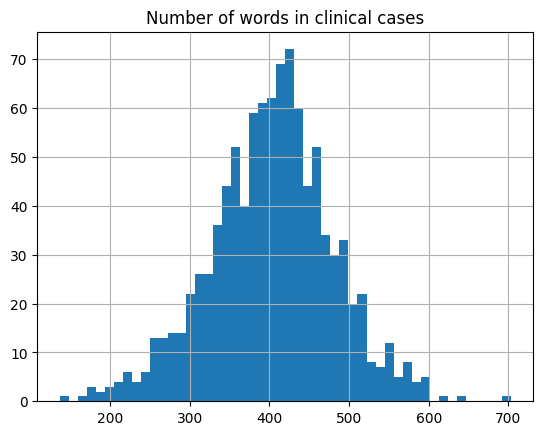

In [114]:
df["n_words"].hist(bins=50)
plt.title("Number of words in clinical cases")

In [115]:
df.describe()

,n_char,n_words
count,1000.000000,1000.000000
mean,3006.822000,402.886000
std,590.927681,77.276624
min,972.000000,137.000000
25%,2667.250000,354.750000
50%,3056.000000,405.000000
75%,3384.000000,452.000000
max,5325.000000,703.000000


In [116]:
long_docs = df[df["n_words"] > 1500]

for i, row in long_docs.iterrows():
    print(row["filename"])
    print(row["text"])
    print("\n\n")

# Structure exploration

Some fields are created when the report is generated. Some interesting conclusions we can extract from below are:

- Not all the generated discharge summaries have the same amount of fields.
- The fields are usually structured as \*\*Section Name:\*\* followed by the content of the section.
- The content can be structured in different ways, some of them are structured in paragraphs, others in bullet points, etc.
- Unknown content is filled with placeholders like \[Datum van Opname\] instead of making it up
- There is some correlation between the amount of fields and the length of the case because it is possible that most of them have placeholders.

In [117]:
print(df.iloc[1]["text"])

**Ontslag Samenvatting**

**Patiëntinformatie:**
- Naam: [Patiënt Naam]
- Leeftijd: 60 jaar
- Geslacht: Vrouw
- Medisch Dossier Nummer: [MDN]
- Datum van Opname: [Opnamedatum]
- Datum van Ontslag: [Ontslagdatum]

**Hoofdklacht:**
De patiënt presenteerde zich met verergerende zwakte en misselijkheid.

**Anamnese van de Huidige Ziekte:**
De patiënt heeft een voorgeschiedenis van dikkedarmkanker en de ziekte van Graves. Ze werd doorverwezen naar de spoedeisende hulp vanuit de kliniek vanwege een abnormaal elektrocardiogram (ECG) na 3 weken van hartkloppingen en aanzienlijk verminderde inspanningstolerantie. Ze ontkende enige pijn op de borst, syncope, orthopneu, paroxysmale nachtelijke dyspneu of oedeem van de onderste extremiteiten. Opmerkelijk is dat ze meldde dat ze 7 dagen voor opname eenmalig cocaïne had gebruikt.

**Voorgeschiedenis:**
- Dikkedarmkanker (gediagnosticeerd 9 maanden geleden, T3N1 matig gedifferentieerd adenocarcinoom)
- Ziekte van Graves

**Behandelingsgeschiedenis:**

In [118]:
# Seems like all the fields are between ** so let's extract them
df["fields"] = df["text"].str.findall(r"\*\*([^\*]+):\*\*")
df["n_fields"] = df["fields"].str.len()
df

,filename,text,text_orig,n_char,n_words,fields,n_fields
0,37829491_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2965,430,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",14
1,34390221_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,4689,581,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",15
2,37861258_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2847,385,"[Patiëntinformatie, Opnamedatum, Ontslagdatum,...",21
3,29521319_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2400,327,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",11
4,32330356_2_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2152,285,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",15
...,...,...,...,...,...,...,...
995,29563373_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2892,400,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",10
996,37085890_1_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3151,404,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",13
997,31368900_1_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,1566,218,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",13
998,35355435_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2869,361,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",13


Text(0.5, 1.0, 'Number of fields in clinical cases')

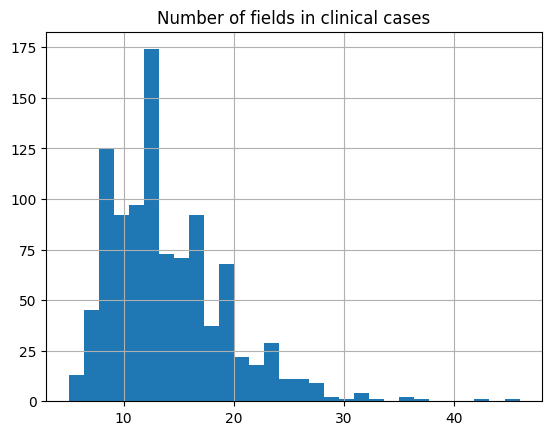

In [119]:
df["n_fields"].hist(bins=30)
plt.title("Number of fields in clinical cases")

In [120]:
df[df["n_fields"] >=50]

,filename,text,text_orig,n_char,n_words,fields,n_fields


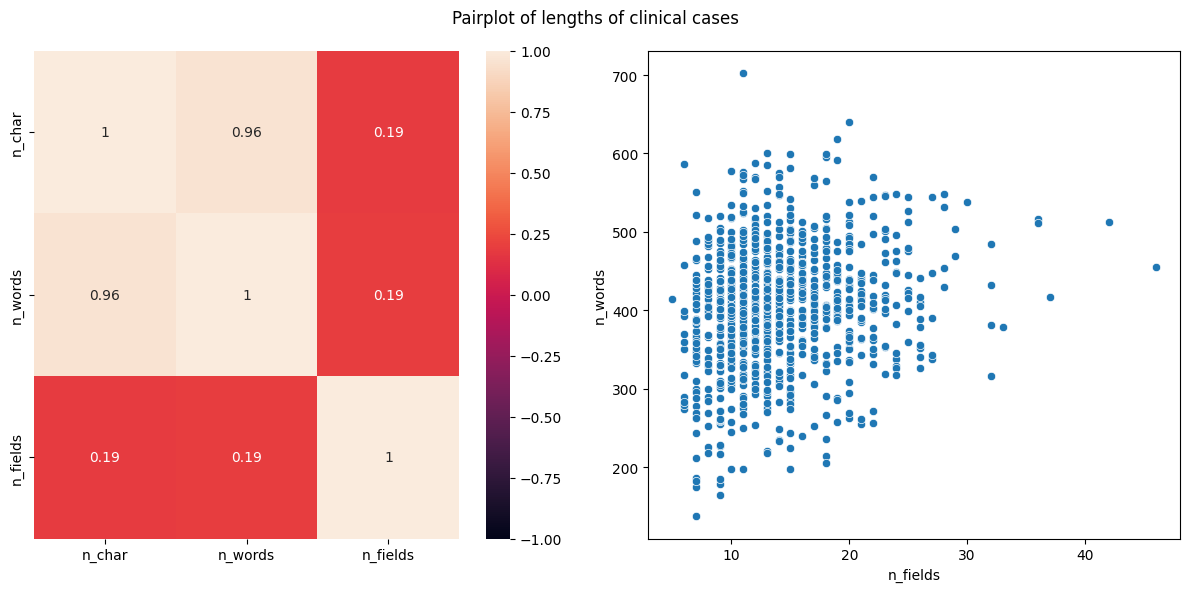

In [121]:
# Heatmap correlation matrix
import seaborn as sns
import numpy as np

cols = ["n_char", "n_words", "n_fields"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1])

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [122]:
df["placeholders"] = df["text"].str.findall(r"\[(.+)\]")
df["n_placeholders"] = df["placeholders"].str.len()
df

,filename,text,text_orig,n_char,n_words,fields,n_fields,placeholders,n_placeholders
0,37829491_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2965,430,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",14,"[Patiënt Naam, Uw Naam, Uw Titel, Datum]",4
1,34390221_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,4689,581,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",15,"[Patiënt Naam, MDN, Opnamedatum, Ontslagdatum,...",6
2,37861258_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2847,385,"[Patiëntinformatie, Opnamedatum, Ontslagdatum,...",21,"[Patiënt Naam, Opnamedatum, Ontslagdatum, Arts...",8
3,29521319_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2400,327,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",11,"[Patiënt Naam, Opnamedatum, Ontslagdatum, Naam...",5
4,32330356_2_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2152,285,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",15,"[Patiënt Naam, Opnamedatum, Ontslagdatum, Arts...",6
...,...,...,...,...,...,...,...,...,...
995,29563373_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2892,400,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",10,"[Patiëntnaam, Opnamedatum, Ontslagdatum, Uw Na...",5
996,37085890_1_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3151,404,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",13,"[Patiënt Naam, Opnamedatum, Ontslagdatum, Lijs...",6
997,31368900_1_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,1566,218,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",13,"[Patiënt Naam, Ontslagdatum, Naam Arts, Titel ...",4
998,35355435_transformed.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2869,361,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",13,"[Patiënt Naam, Datum] op [Locatie, Naam Arts, ...",5


Text(0.5, 1.0, 'Number of placeholders in clinical cases')

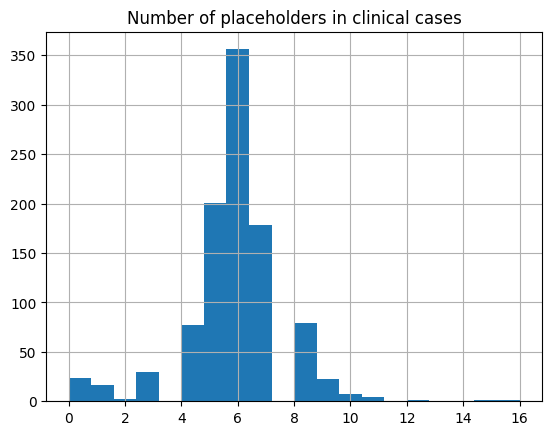

In [123]:
df["n_placeholders"].hist(bins=20)
plt.title("Number of placeholders in clinical cases")

In [124]:
df["cat_ph"] = df["n_placeholders"].apply(lambda x: "0" if x == 0 else "1-5" if x <= 5 else "6-10" if x <= 10 else ">10")

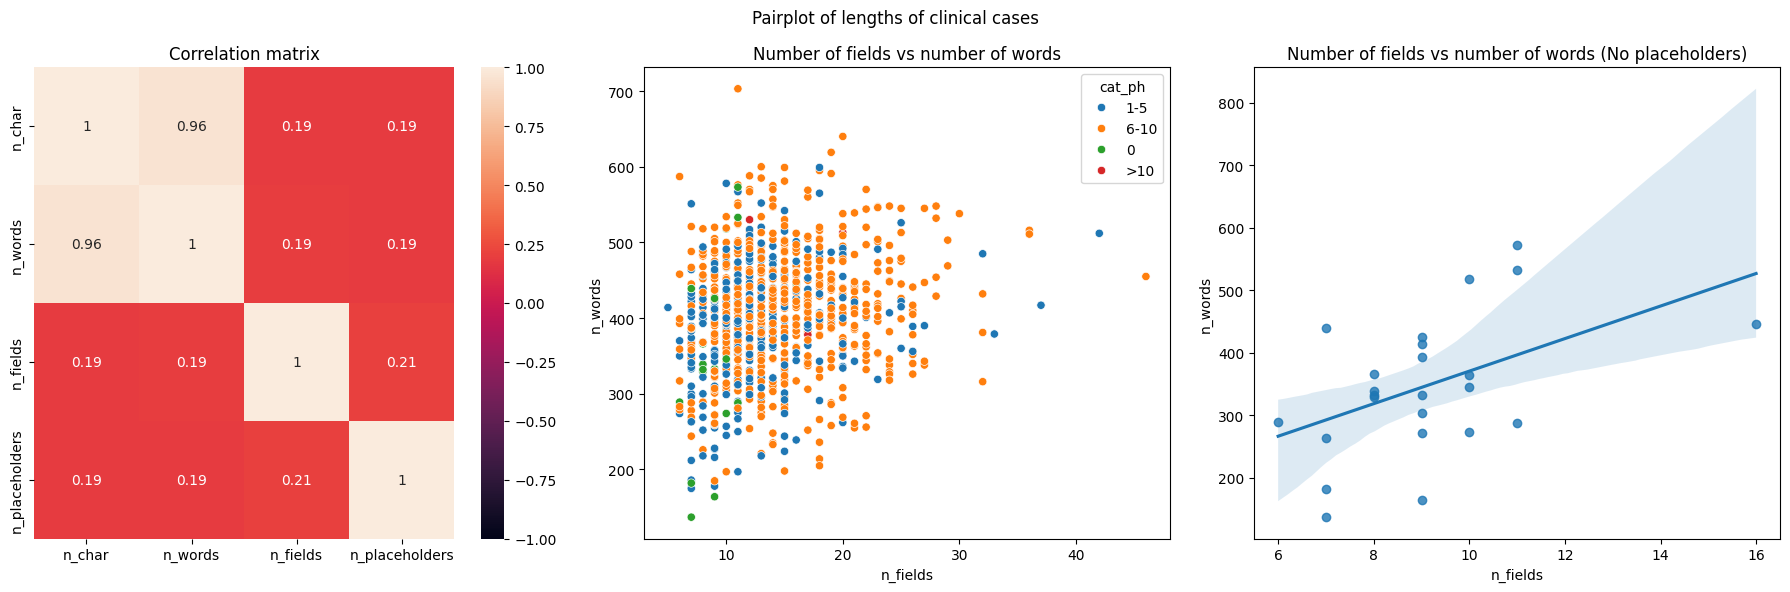

In [125]:
# Heatmap correlation matrix

cols = ["n_char", "n_words", "n_fields", "n_placeholders"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title("Correlation matrix")

sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1], hue="cat_ph")
ax[1].set_title("Number of fields vs number of words")

sns.regplot(x="n_fields", y="n_words", data=df[df["n_placeholders"] == 0], ax=ax[2])
ax[2].set_title("Number of fields vs number of words (No placeholders)")

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [126]:
df.describe()

,n_char,n_words,n_fields,n_placeholders
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3006.822000,402.886000,14.031000,5.801000
std,590.927681,77.276624,5.275592,1.780047
min,972.000000,137.000000,5.000000,0.000000
25%,2667.250000,354.750000,10.000000,5.000000
50%,3056.000000,405.000000,13.000000,6.000000
75%,3384.000000,452.000000,17.000000,7.000000
max,5325.000000,703.000000,46.000000,16.000000
